In [48]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)


from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *


In [49]:
faces = np.load("olivetti_faces.npy")
faces_target = np.load("olivetti_faces_target.npy")

target_df = pd.DataFrame(faces_target)

faces_reshape = faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
faces_df = pd.DataFrame(faces_reshape)
faces_df

0         1         2         3         4         5         6     \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

         7         8         9     ...      4086      4087      4088  \
0    0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893   
1    0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364   
2    0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818   
3    0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025   
4    0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.636364  0.665289  0.698347  ...  0.388430  0.396694  0.264463   
396  0.512397  0.574380  0.628099  ...  0.380165  0.334711  0.289256   
397  0.669421  0.673554  0.702479  ...  0.194215  0.148760  0.152893   
398  0.400826  0.487603  0.549587  ...  0.446281  0.392562  0.367769   
399  0.615702  0.661157  0.615702  ...  0.276859  0.264463  0.293388   

         4089      4090      4091      4092      4093      4094      4095  
0    0.661157  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1    0.148760  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2    0.136364  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3    0.685950  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4    0.173554  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.099174  0.181818  0.243802  0.247934  0.161157  0.157025  0.136364  
396  0.285124  0.338843  0.404959  0.458678  0.487603  0.512397  0.549587  
397  0.161157  0.161157  0.173554  0.157025  0.177686  0.148760  0.190083  
398  0.409091  0.479339  0.524793  0.545455  0.574380  0.590909  0.603306  
399  0.301653  0.293388  0.322314  0.322314  0.359504  0.355372  0.384298  

[400 rows x 4096 columns]

In [50]:
print("There are {} images in the dataset".format(len(faces)))
print("There are {} unique targets in the dataset".format(len(np.unique(faces_target))))
print("Size of each image is {}x{}".format(faces.shape[1],faces.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(faces[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [51]:

print(faces_df.describe())

             0           1           2           3           4           5     \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.400134    0.434236    0.476281    0.518481    0.554845    0.588729   
std      0.180695    0.189504    0.194742    0.193313    0.188593    0.178481   
min      0.086777    0.066116    0.090909    0.041322    0.107438    0.107438   
25%      0.243802    0.267562    0.314050    0.383264    0.446281    0.515496   
50%      0.392562    0.458678    0.512397    0.545455    0.584711    0.615702   
75%      0.528926    0.575413    0.636364    0.666322    0.702479    0.714876   
max      0.805785    0.822314    0.871901    0.892562    0.871901    0.871901   

             6           7           8           9     ...        4086  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.621426    0.647510    0.664814    0.676591  ...    0.363079   
std      0.167109    0.155024    0.147616    0.1

In [52]:
faces_df.T.std(axis=0)

0      0.149412
1      0.190776
2      0.165352
3      0.205989
4      0.188805
         ...   
395    0.169348
396    0.159671
397    0.175455
398    0.176875
399    0.153869
Length: 400, dtype: float32

In [53]:
faces_df.T.var()

0      0.022324
1      0.036396
2      0.027341
3      0.042432
4      0.035647
         ...   
395    0.028679
396    0.025495
397    0.030784
398    0.031285
399    0.023676
Length: 400, dtype: float32

In [54]:
pd.DataFrame(np.array(faces_df.iloc[0,:]).reshape((64,64)))

0         1         2         3         4         5         6   \
0   0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1   0.342975  0.404959  0.438017  0.471074  0.553719  0.623967  0.669421   
2   0.342975  0.417355  0.450413  0.512397  0.574380  0.644628  0.677686   
3   0.305785  0.409091  0.471074  0.524793  0.595041  0.652893  0.673554   
4   0.334711  0.421488  0.475207  0.582645  0.640496  0.665289  0.665289   
..       ...       ...       ...       ...       ...       ...       ...   
59  0.206612  0.198347  0.194215  0.206612  0.198347  0.198347  0.185950   
60  0.206612  0.202479  0.198347  0.214876  0.190083  0.202479  0.173554   
61  0.214876  0.206612  0.223140  0.202479  0.214876  0.157025  0.181818   
62  0.202479  0.210744  0.210744  0.206612  0.202479  0.107438  0.190083   
63  0.202479  0.206612  0.202479  0.214876  0.144628  0.095041  0.227273   

          7         8         9   ...        54        55        56        57  \
0   0.677686  0.690083  0.685950  ...  0.698347  0.677686  0.657025  0.632231   
1   0.685950  0.690083  0.685950  ...  0.698347  0.673554  0.657025  0.636364   
2   0.690083  0.694215  0.694215  ...  0.685950  0.677686  0.657025  0.644628   
3   0.677686  0.685950  0.685950  ...  0.690083  0.677686  0.657025  0.648760   
4   0.673554  0.681818  0.677686  ...  0.702479  0.685950  0.661157  0.644628   
..       ...       ...       ...  ...       ...       ...       ...       ...   
59  0.516529  0.677686  0.657025  ...  0.611570  0.611570  0.615702  0.640496   
60  0.528926  0.681818  0.677686  ...  0.623967  0.632231  0.628099  0.657025   
61  0.545455  0.685950  0.702479  ...  0.628099  0.648760  0.648760  0.661157   
62  0.566116  0.685950  0.702479  ...  0.644628  0.665289  0.648760  0.661157   
63  0.590909  0.685950  0.710744  ...  0.665289  0.669421  0.652893  0.661157   

          58        59        60        61        62        63  
0   0.566116  0.524793  0.446281  0.371901  0.330579  0.305785  
1   0.603306  0.512397  0.442149  0.371901  0.338843  0.314050  
2   0.603306  0.570248  0.433884  0.380165  0.338843  0.297521  
3   0.623967  0.541322  0.471074  0.384298  0.347107  0.264463  
4   0.644628  0.553719  0.487603  0.388430  0.367769  0.334711  
..       ...       ...       ...       ...       ...       ...  
59  0.512397  0.177686  0.144628  0.157025  0.152893  0.161157  
60  0.500000  0.161157  0.157025  0.161157  0.165289  0.169421  
61  0.495868  0.148760  0.157025  0.152893  0.165289  0.173554  
62  0.487603  0.136364  0.152893  0.148760  0.161157  0.165289  
63  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  

[64 rows x 64 columns]

Text(0.5, 0, 'Label')

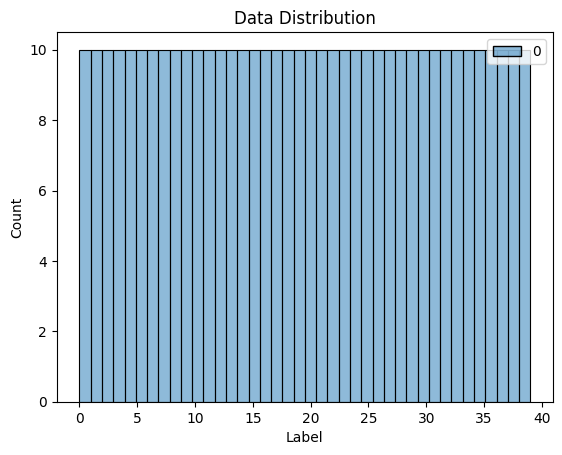

In [55]:

sns.histplot(target_df,bins=40)
plt.title("Data Distribution")
plt.xlabel("Label")

In [56]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

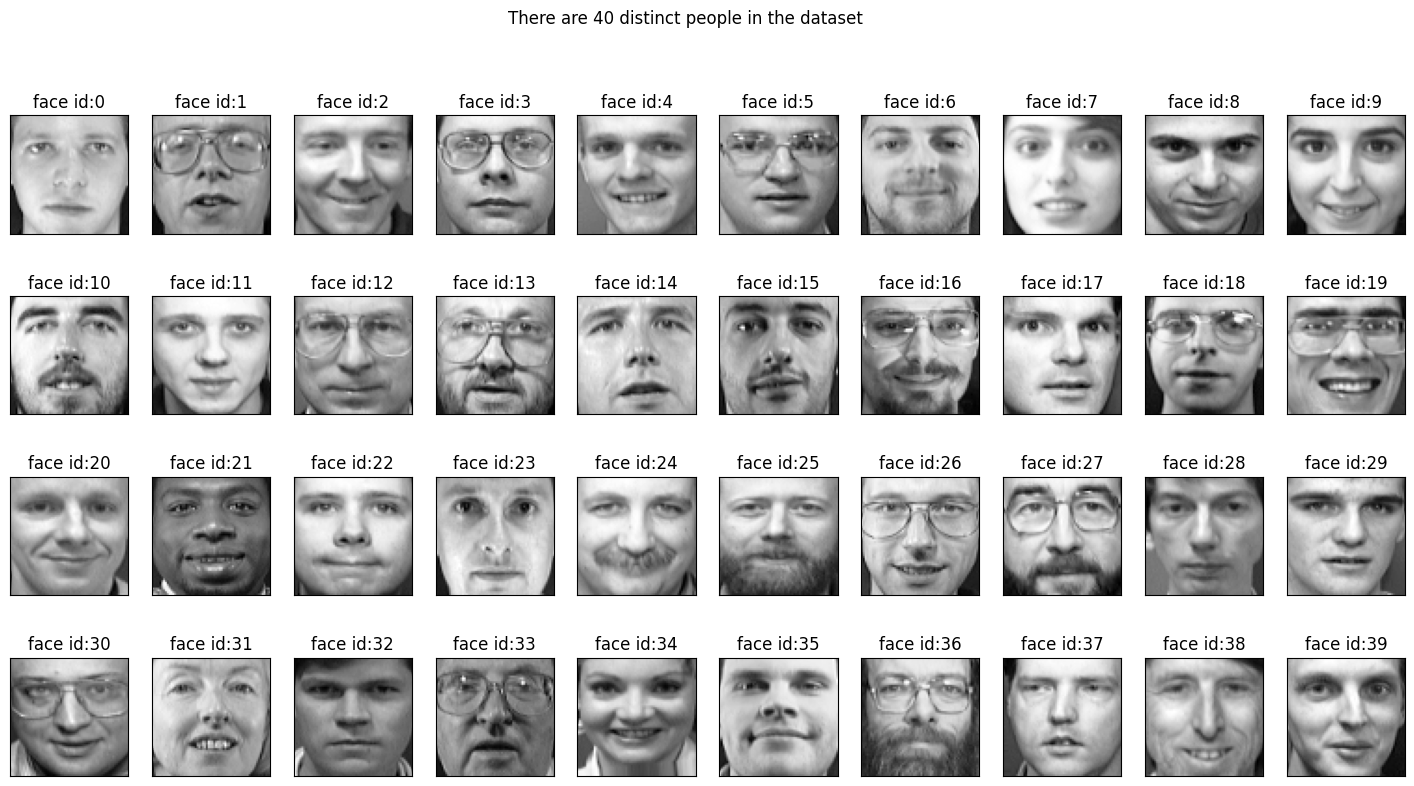

In [57]:
show_40_distinct_people(faces, np.unique(faces_target))

In [58]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

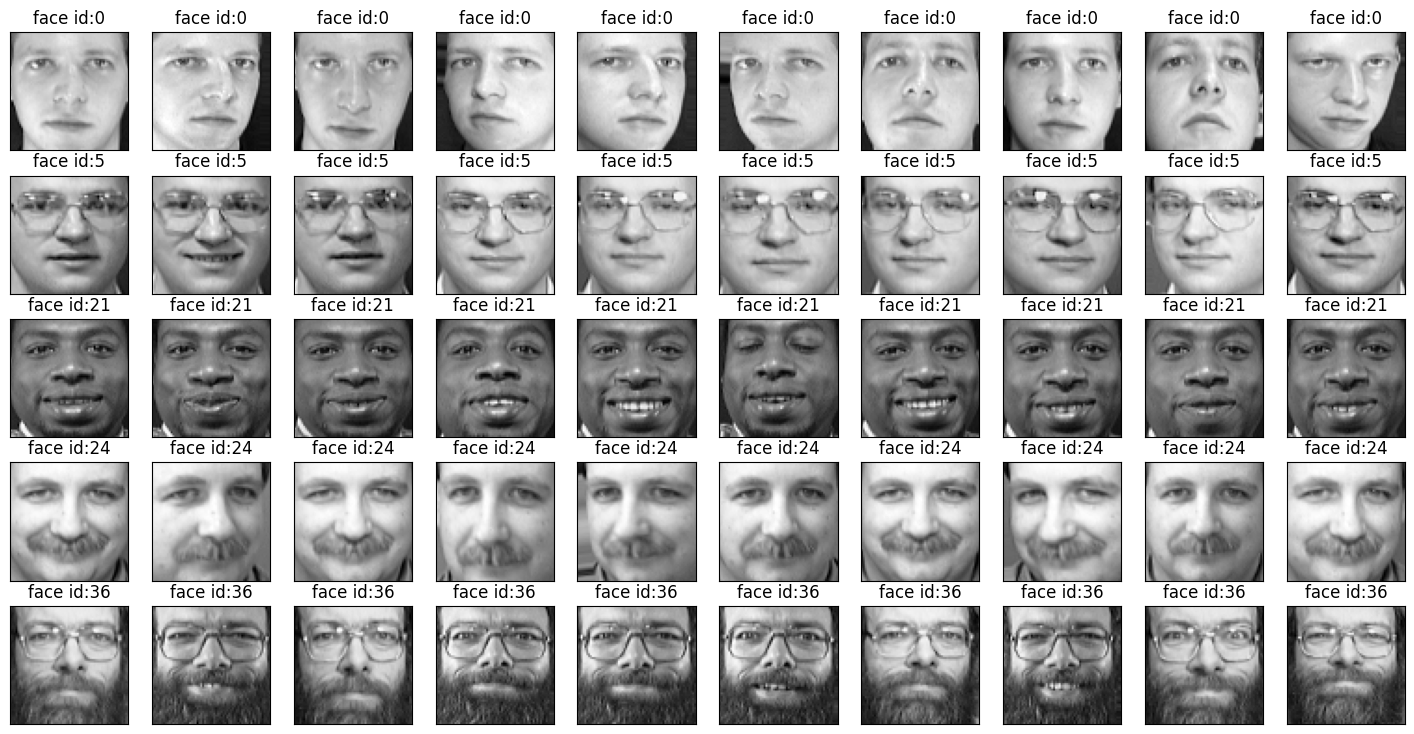

In [59]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=faces, subject_ids=[0,5, 21, 24, 36])

In [60]:
X, X_test, y, y_test=train_test_split(faces_df.values, faces_target, test_size=0.2, stratify=faces_target,shuffle=True, random_state=42)
print("X_train shape:",X.shape)
print("y_train shape:{}".format(y.shape))

X_train shape: (320, 4096)
y_train shape:(320,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

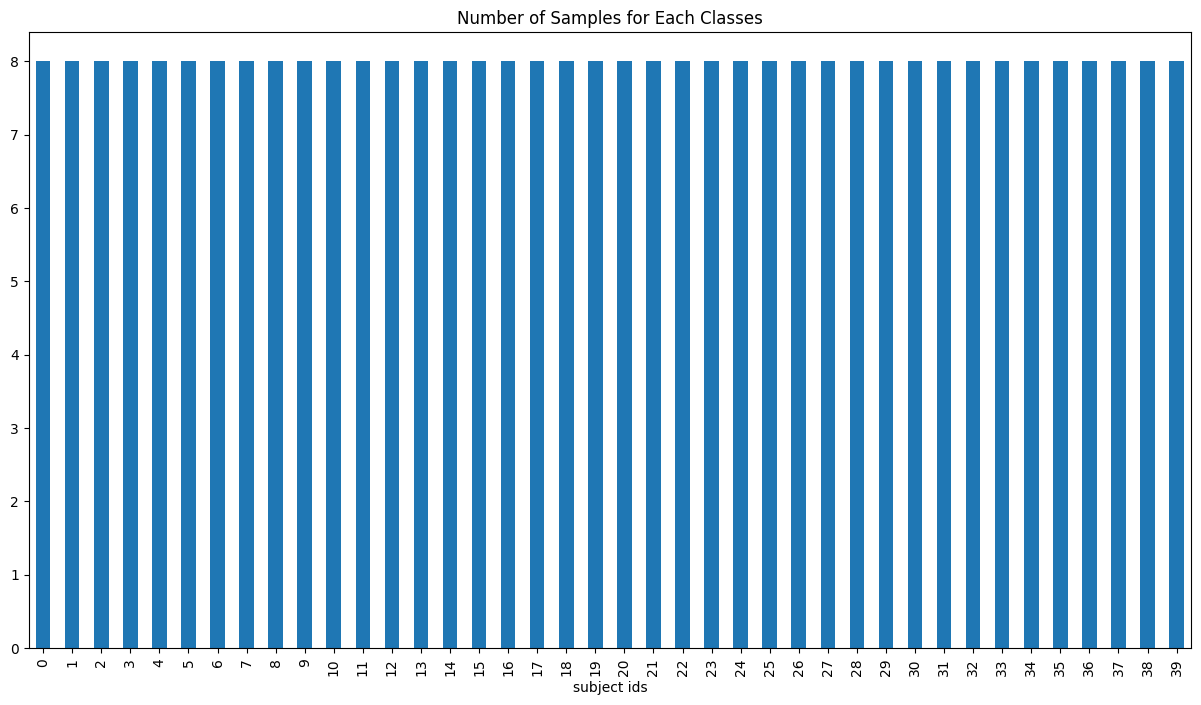

In [61]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score



In [63]:
def lda_model (X,y, lda_object):
    num_folds = 4

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)
    lda = lda_object
    accuracy1 = 0
    accuracy2 = 0
    initial_theta = None
    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        lda = lda_object

        #if initial_theta is not None:
            #lda.coef_ = initial_theta
        # Fit the model on the training data
        history = lda.fit(X_train, y_train)

        initial_theta = lda.coef_

        y_pred = lda.predict(X_val)

        # Calculate accuracy
        accuracy1 += accuracy_score(y_val, y_pred)
        
        y_pred = lda.predict(X_train)
        accuracy2 += accuracy_score(y_train, y_pred)
    print(f"Accuracy val: {accuracy1/4:.2f}")
    print(f"Accuracy train: {accuracy2/4:.2f}")
    return lda
    



In [64]:
lda_object = LinearDiscriminantAnalysis()
lda = lda_model(X,y,lda_object)


lda.fit(X, y)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")
lda = LinearDiscriminantAnalysis()

Accuracy val: 0.96
Accuracy train: 1.00
Accuracy test: 1.00


In [65]:
from sklearn.model_selection import GridSearchCV
#lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, n_components=None, store_covariance=False)
param_grid = {
    'n_components': [1, 2, 3, 4, 5, 10, None], }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
grid_search.fit(X, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


Best Parameters:  {'n_components': 1}
Best Accuracy:  0.96875


In [66]:
"""
lda =  LinearDiscriminantAnalysis()
param_grid = {'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
               'solver': ['svd', 'lsqr', 'eigen'] 
             }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
grid_search.fit(X, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
"""


'\nlda =  LinearDiscriminantAnalysis()\nparam_grid = {\'shrinkage\': [None, \'auto\', 0.1, 0.5, 0.9],\n               \'solver\': [\'svd\', \'lsqr\', \'eigen\'] \n             }\ngrid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed\n\n# Perform the grid search on your data\ngrid_search.fit(X, y)\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best Accuracy: ", grid_search.best_score_)\n'

In [67]:
#Best Parameters:  {'shrinkage': 'auto', 'solver': 'lsqr'}

In [68]:
lda_object = LinearDiscriminantAnalysis(shrinkage= 'auto', solver = 'lsqr',n_components =1)
lda = lda_model(X,y,lda_object)


lda.fit(X, y)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")
lda = LinearDiscriminantAnalysis()

Accuracy val: 0.98
Accuracy train: 1.00
Accuracy test: 0.99


<Figure size 640x480 with 0 Axes>

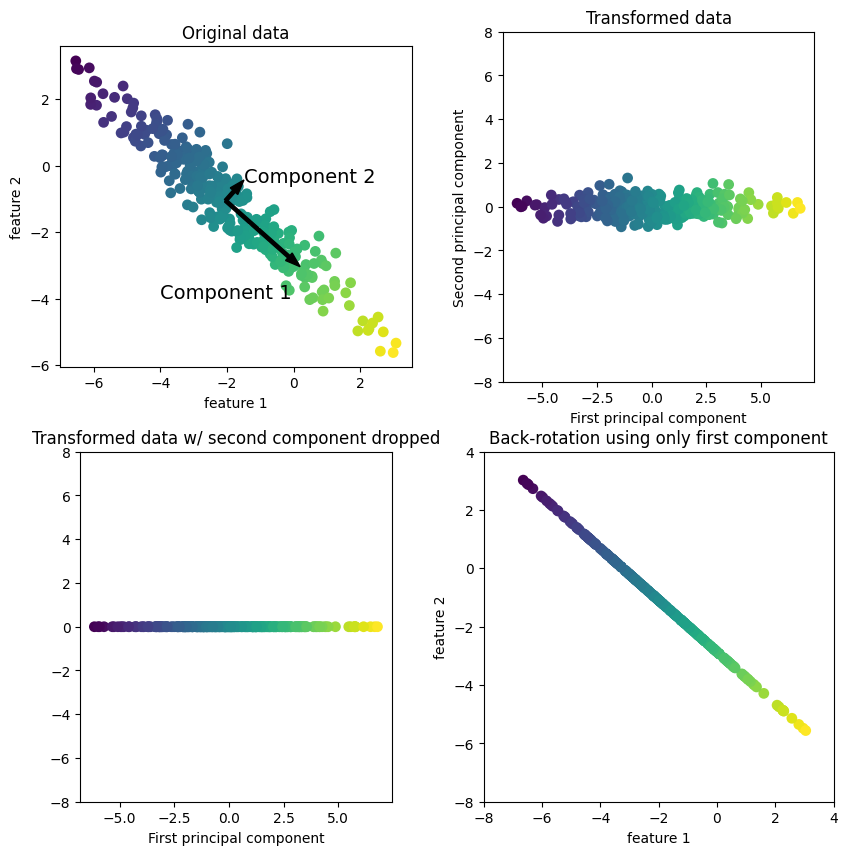

In [69]:
!pip install mglearn
import mglearn
plt.figure()
mglearn.plots.plot_pca_illustration()
plt.savefig('pca.png')

In [70]:
from sklearn.decomposition import PCA
X = faces_df.values
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

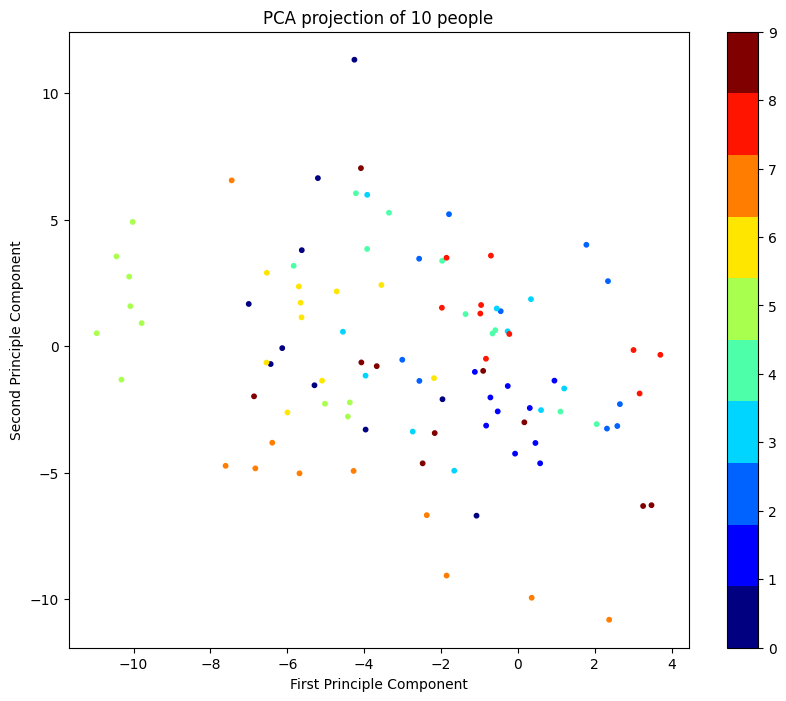

In [71]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=faces_target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

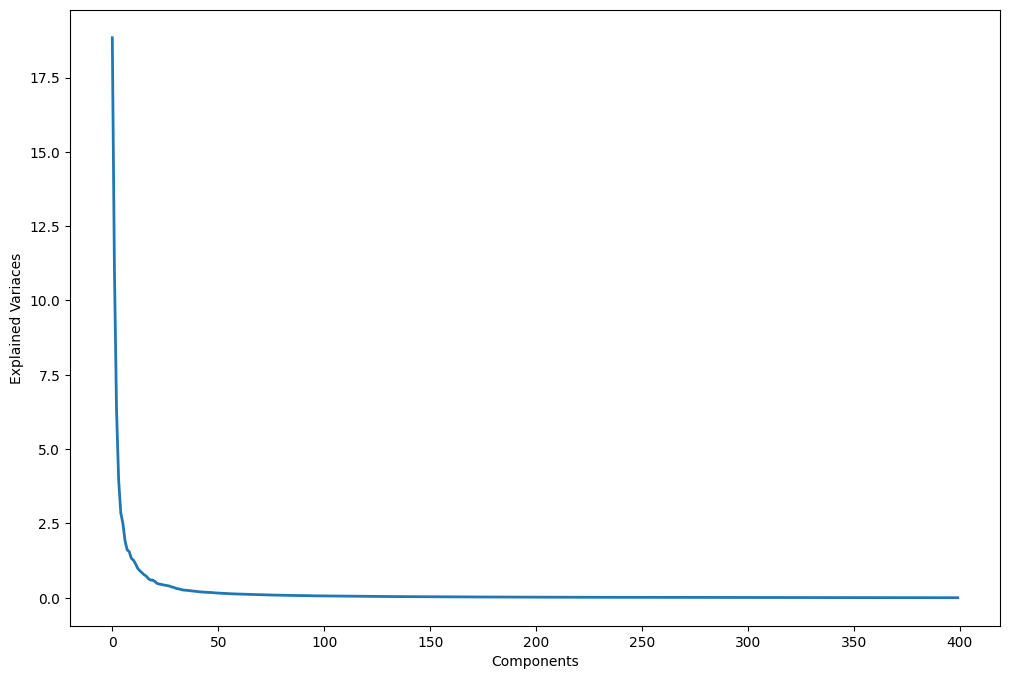

In [72]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [73]:
n_components=90
X = faces_df.values
pca=PCA(n_components=n_components)
pca.fit(X)
X_pca=pca.transform(X)


Text(0.5, 1.0, 'Average Face')

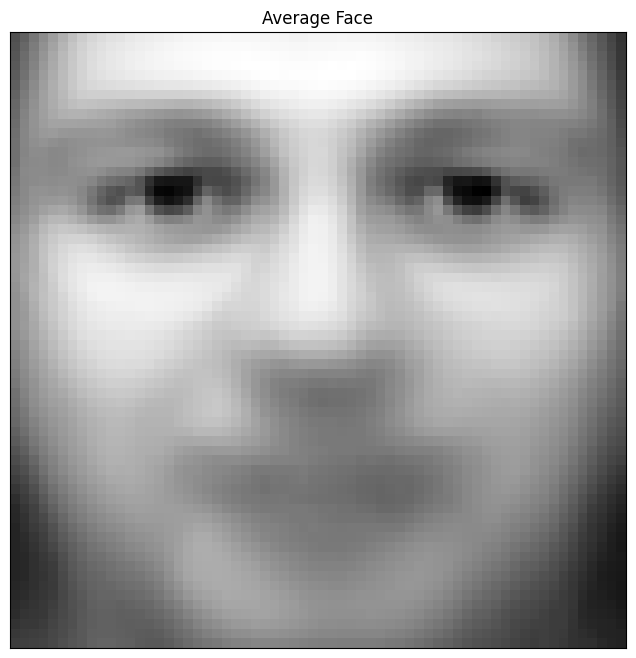

In [74]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

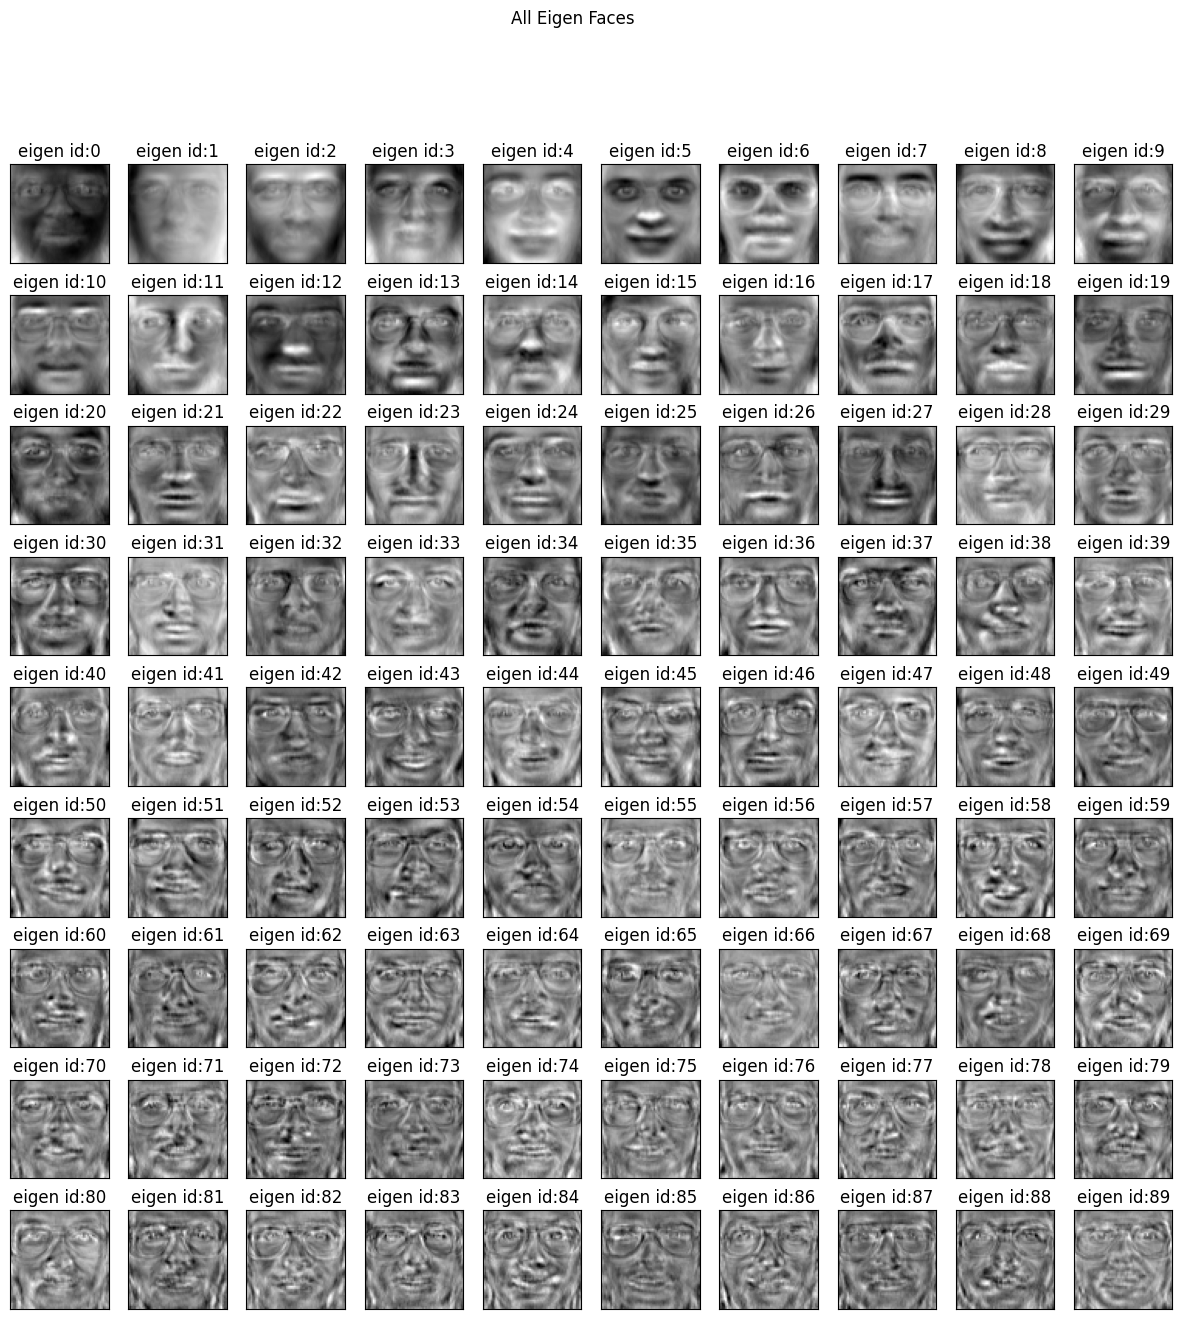

In [75]:

number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, faces.shape[1], faces.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

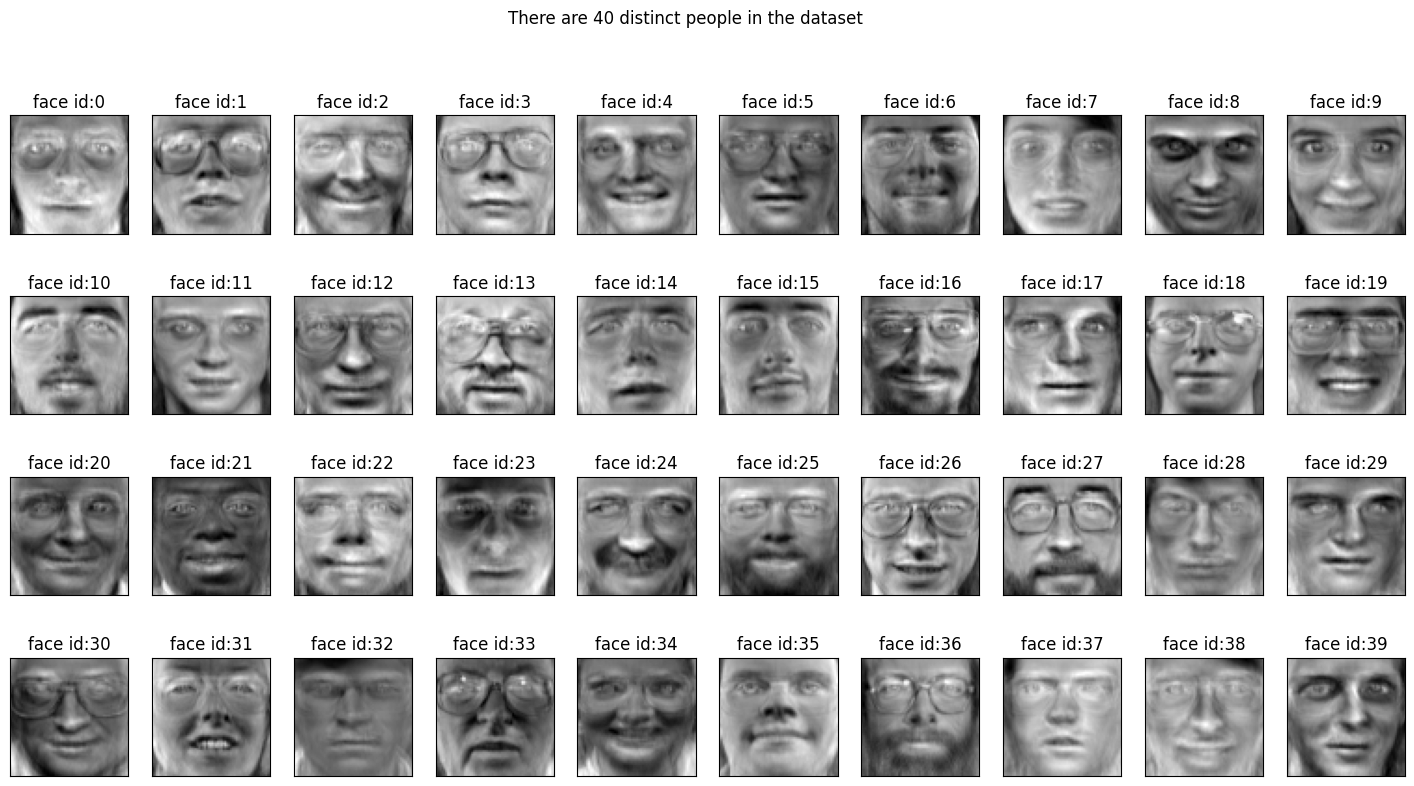

In [76]:
reconstructed_faces = np.dot(X_pca, eigen_faces.reshape(number_of_eigenfaces, -1)).reshape(faces.shape)

show_40_distinct_people(reconstructed_faces, np.unique(faces_target))

In [77]:
X_pca=pca.transform(X)
X_test_pca=pca.transform(X_test)
X_pca.shape


(400, 90)

In [78]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test=train_test_split(X_pca, faces_target, test_size=0.2, stratify=faces_target,shuffle=True, random_state=42)
lda =  LinearDiscriminantAnalysis(solver='svd')
param_grid = {'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
              'n_components': [1, 2, 3, 4, 5, 10, None]
             }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
grid_search.fit(X_pca_train, y_pca_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

#second Best Parameters:  {'n_components': 1, 'shrinkage': None,'solver': 'svd'}
#Best Parameters:  {'shrinkage': 0.1, 'solver': 'lsqr'}

Fitting 4 folds for each of 35 candidates, totalling 140 fits
Best Parameters:  {'n_components': 1, 'shrinkage': None}
Best Accuracy:  0.965625


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
112 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/casal/anaconda3/envs/firstEnv/lib/py

In [79]:

lda_object = LinearDiscriminantAnalysis(solver = 'svd',n_components =2)
lda = lda_model(X_pca_train,y_pca_train,lda_object)


lda.fit(X_pca_train, y)
y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")

X.shape

Accuracy val: 0.97
Accuracy train: 1.00
Accuracy test: 0.99


(400, 4096)

In [80]:
from sklearn.svm import SVC




In [83]:
X_train, X_test, y_train, y_test = train_test_split(faces_df.values, faces_target, test_size=0.2, stratify=faces_target, shuffle=True, random_state=42)

X_lda_train = lda_object.fit_transform(X_train, y_train)
X_lda_test = lda_object.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']}
svm_classifier = SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=4, scoring='accuracy', verbose=1)

grid_search.fit(X_lda_train, y_train)

best_params = grid_search.best_params_
# Optionally, you can get the best SVM model from the grid search
best_svm_classifier = grid_search.best_estimator_
# Transform the test set using LDA
X_lda_test = lda_object.transform(X_test)

# Predict on the test set
y_pred_test = best_svm_classifier.predict(X_lda_test)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("AccuracyTest:", accuracy_test)




Fitting 4 folds for each of 7 candidates, totalling 28 fits
AccuracyTest: 0.375


In [ ]:
y_predTest = best_svm_classifier.predict(X_test)
accuracyTest = accuracy_score(y_test, y_predTest)
print("AccuracyTest:", accuracyTest)

In [ ]:
resultsSVM = {
    'Model': [],
    'Dataset': [],
    'Accuracy': []
}

resultsSVM['Model'].append('SVM')
resultsSVM['Dataset'].append('Test Set')
resultsSVM['Accuracy'].append(accuracyTest*100)

df = pd.DataFrame(resultsSVM)
df['Accuracy'] = df['Accuracy'].map('{:.2f}%'.format)
display(df)

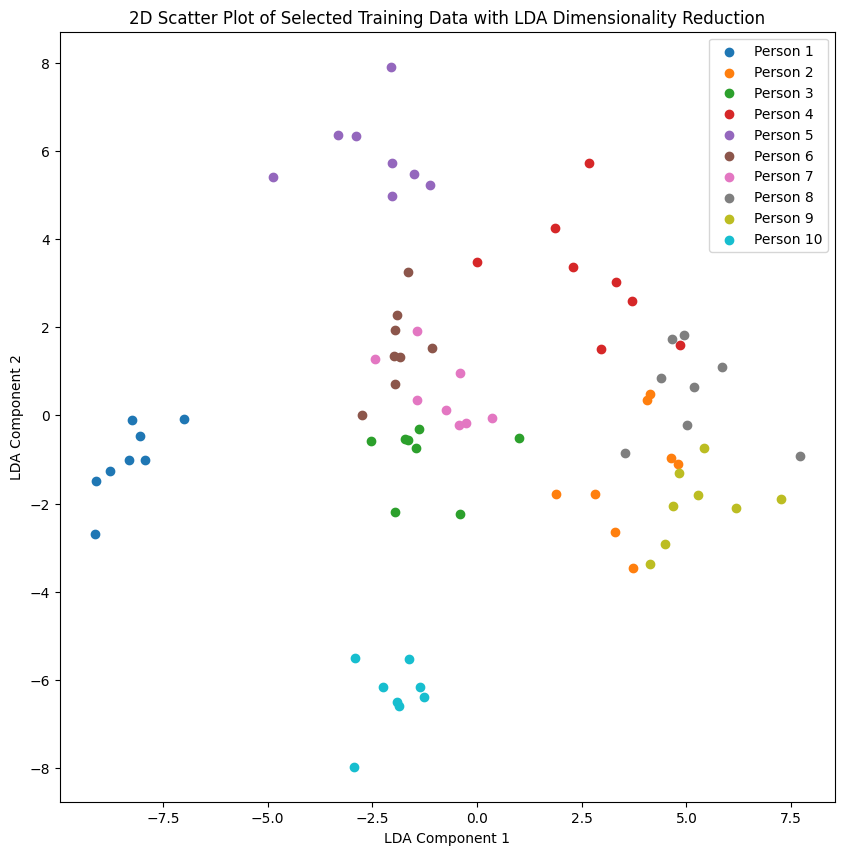

In [35]:
X_train, X_test, y_train, y_test=train_test_split(faces_df.values, faces_target, test_size=0.2, stratify=faces_target,shuffle=True, random_state=42)
X_lda_train = lda_object.fit_transform(X_train, y_train)
X_lda_test = lda_object.transform(X_test)


from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, and y_test

# Select only 10 people for visualization
selected_people = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
selected_indices_train = [i for i, label in enumerate(y_train) if label in selected_people]

# Filter data for the selected people
X_selected_train = X_train[selected_indices_train]
y_selected_train = y_train[selected_indices_train]

# Fit LDA model for dimensionality reduction
lda_object = LinearDiscriminantAnalysis(n_components=2)
X_lda_train = lda_object.fit_transform(X_selected_train, y_selected_train)
plt.figure(figsize=(10,10))
# Plot the 2D scatter plot for the selected people in the training data
for class_label in set(y_selected_train):
    plt.scatter(X_lda_train[y_selected_train == class_label, 0],
                X_lda_train[y_selected_train == class_label, 1],
                label=f'Person {class_label}')

plt.title('2D Scatter Plot of Selected Training Data with LDA Dimensionality Reduction')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()



<module 'matplotlib.pyplot' from '/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

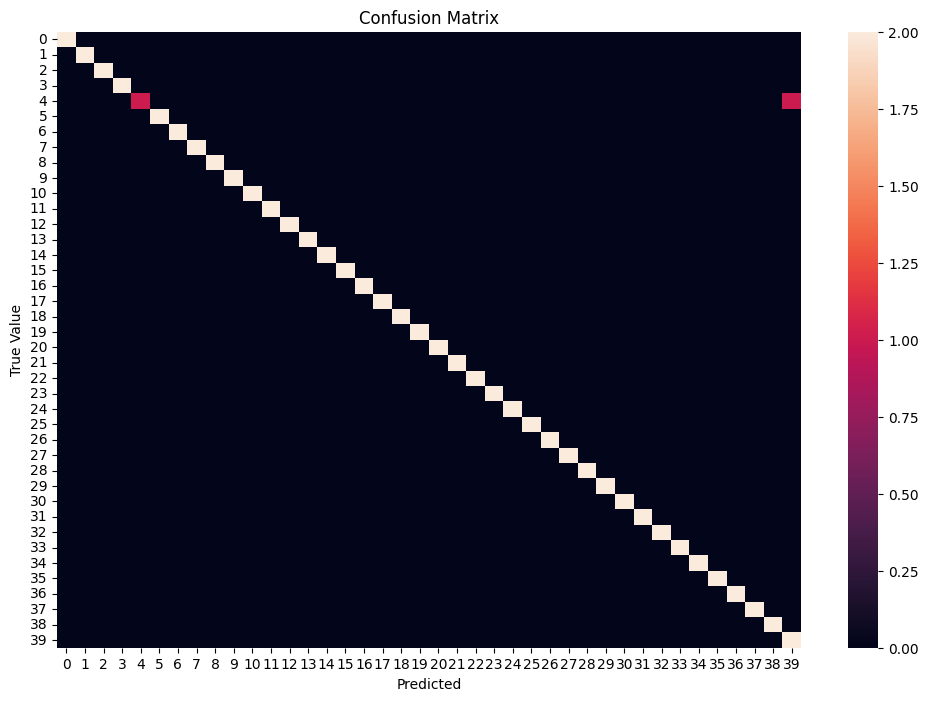

In [36]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(1, figsize=(12, 8))
sns.heatmap(cm, fmt='g')  # annot=True to display the counts, fmt='g' to format as integers

plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

plt

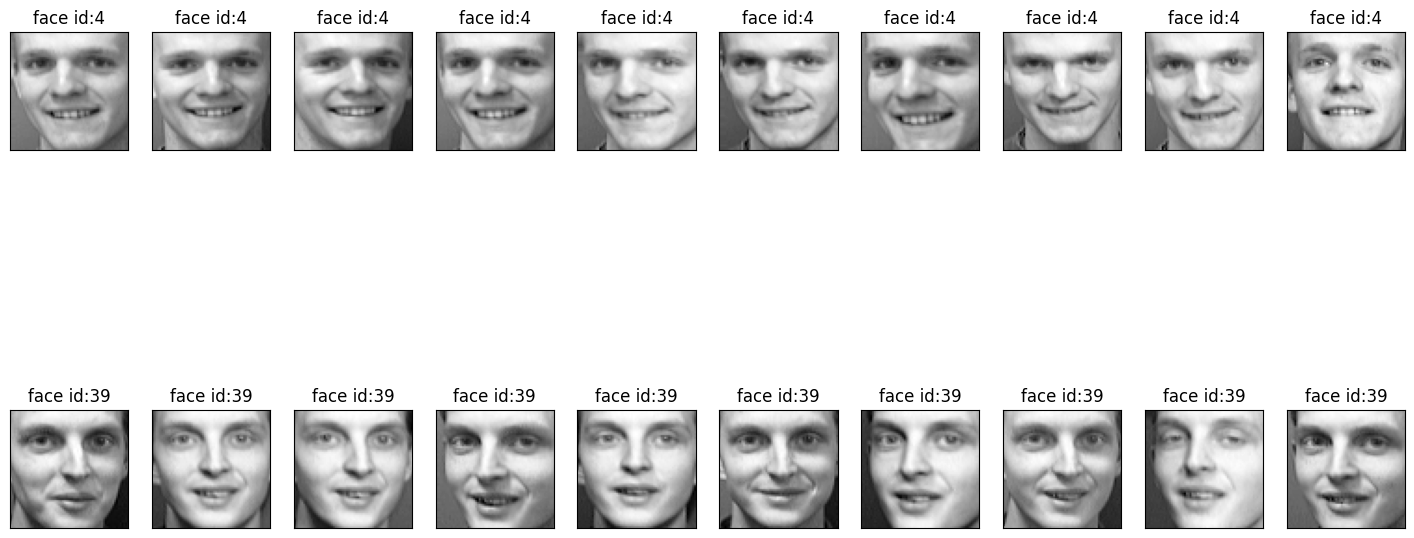

In [37]:
show_10_faces_of_n_subject(images=faces, subject_ids=[4,39])

In [38]:

# Apply LDA transformation to the training and testing data
lda_object = LinearDiscriminantAnalysis(n_components = 9)
lda = lda_model(X_pca_train,y_pca_train,lda_object)

X_train_lda = lda.transform(X_pca_train)
X_test_lda = lda.transform(X_pca_test)



Accuracy val: 0.97
Accuracy train: 1.00


In [39]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )
    ])
model.compile(optimizer='adam',loss='categorical_crossentropy')
y_one_hot = to_categorical(y, num_classes=40)  # Assuming you have 10 classes, adjust accordingly

    # Train the model
history = model.fit(X_train_lda, y_one_hot, epochs=60,verbose=0)

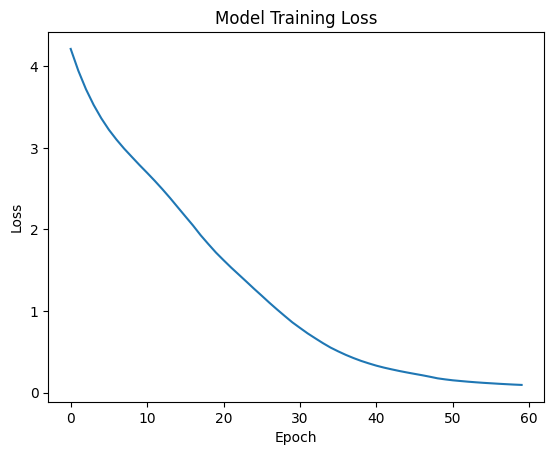

In [40]:
#tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [41]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )
    ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

num_folds = 4

    # Create a stratified k-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


    # Train the model

accuracy1 = 0
accuracy2 = 0
initial_theta = None
    # Perform stratified k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X_train_lda, y):
    X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
    y_train, y_val = y[train_index], y[test_index]
    y_train_one_hot = to_categorical(y_train, num_classes=40)   
    y_val_one_hot = to_categorical(y_val, num_classes=40) 

    history = model.fit(X_train, y_train_one_hot, epochs=60, verbose=0)

    final_theta = model.get_weights()

    # Set the initial parameters for the next iteration
    model.set_weights(final_theta)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

    # Predict on the training set
    y_pred_train = model.predict(X_train)

    # Calculate accuracy for the training set
    accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
# Average accuracy over folds
accuracy1 /= num_folds
accuracy2 /= num_folds

print(f"Average Accuracy (Validation): {accuracy1:.2%}")
print(f"Average Accuracy (Training): {accuracy2:.2%}")

8/8 [==============================] - 0s 1ms/step
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 100.00%


In [42]:
y_test_one_hot = to_categorical(y_test, num_classes=40)

# Evaluate the model on the test set
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

num_folds = 4
validation_accuracies = []
training_accuracies = []
test_accuracies = []
for k in [8,16,32,64,128]:
 
        # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


        # Train the model

    accuracy1 = 0
    accuracy2 = 0
    initial_theta = None
        # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)   
        y_val_one_hot = to_categorical(y_val, num_classes=40) 

        history = model.fit(X_train, y_train_one_hot, epochs=60, verbose=0,batch_size = k)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds
    
    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)
    test_accuracies.append(test_accuracy)

8/8 [==============================] - 0s 990us/step


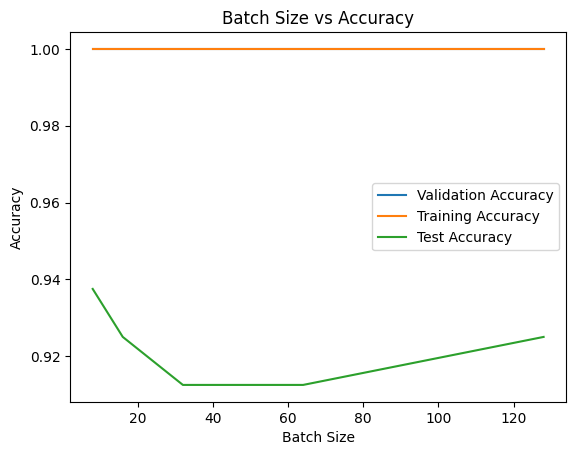

In [43]:
# Plotting
batch_sizes = [8,16,32,64,128]
plt.plot(batch_sizes, validation_accuracies, label='Validation Accuracy')
plt.plot(batch_sizes, training_accuracies, label='Training Accuracy')
plt.plot(batch_sizes, test_accuracies, label='Test Accuracy')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.3006
Test Accuracy: 92.50%


In [45]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming X_train_lda is your input data and y is your target variable
# Assuming y_test and X_test_lda are your test data
# Assuming num_folds is defined

y_test_one_hot = to_categorical(y_test, num_classes=40)

# Hyperparameters
reg_params = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]

validation_accuracies = []
training_accuracies = []
test_accuracies = []
for reg_param in reg_params:

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

    # Initialize model with L2 regularization
    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train_lda.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(reg_param)),
        Dense(40, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    accuracy1 = 0
    accuracy2 = 0

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)
        y_val_one_hot = to_categorical(y_val, num_classes=40)

        history = model.fit(X_train, y_train_one_hot, epochs=60, verbose=0, batch_size=32)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))

    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds

    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)

    print(f"Regularization Parameter: {reg_param}")
    print(f"Average Accuracy (Validation): {accuracy1:.2%}")
    print(f"Average Accuracy (Training): {accuracy2:.2%}")
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    test_accuracies.append(test_accuracy)
# Now you have the lists validation_accuracies and training_accuracies for different regularization parameters.


8/8 [==============================] - 0s 841us/step
Regularization Parameter: 1e-05
Average Accuracy (Validation): 99.69%
Average Accuracy (Training): 99.90%
Test Loss: 0.2312
Test Accuracy: 92.50%
8/8 [==============================] - 0s 784us/step
Regularization Parameter: 0.0001
Average Accuracy (Validation): 99.69%
Average Accuracy (Training): 99.90%
Test Loss: 0.2955
Test Accuracy: 91.25%
8/8 [==============================] - 0s 851us/step
Regularization Parameter: 0.001
Average Accuracy (Validation): 99.37%
Average Accuracy (Training): 99.79%
Test Loss: 0.2951
Test Accuracy: 90.00%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 0.01
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 99.90%
Test Loss: 0.4457
Test Accuracy: 92.50%
8/8 [==============================] - 0s 732us/step
Regularization Parameter: 0.1
Average Accuracy (Validation): 99.38%
Average Accuracy (Training): 99.79%
Test Loss: 0.5157
Test Accuracy: 96.25%
8/8 [===

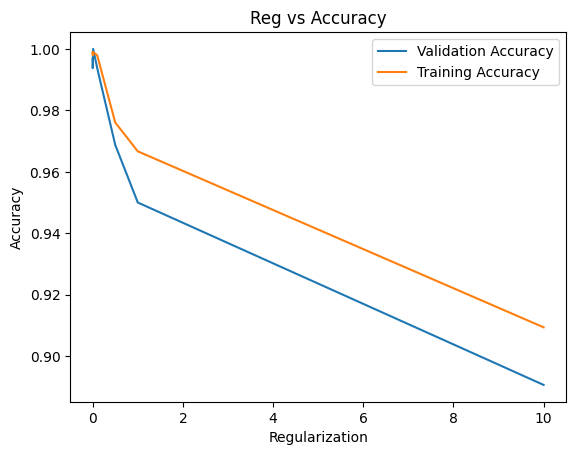

In [46]:
plt.plot(reg_params, validation_accuracies, label='Validation Accuracy')
plt.plot(reg_params, training_accuracies, label='Training Accuracy')
plt.title('Reg vs Accuracy')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming X_train_lda is your input data and y is your target variable
# Assuming y_test and X_test_lda are your test data
# Assuming num_folds is defined

y_test_one_hot = to_categorical(y_test, num_classes=40)

# Hyperparameters
units = list(range(20, 81))

validation_accuracies = []
training_accuracies = []
test_accuracies = []
for unit in units:

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

    # Initialize model with L2 regularization
    model = Sequential([
        Dense(unit, activation='relu', input_shape=(X_train_lda.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    accuracy1 = 0
    accuracy2 = 0

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)
        y_val_one_hot = to_categorical(y_val, num_classes=40)

        history = model.fit(X_train, y_train_one_hot, epochs=60, verbose=0, batch_size=32)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))

    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds

    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)

    print(f"Regularization Parameter: {reg_param}")
    print(f"Average Accuracy (Validation): {accuracy1:.2%}")
    print(f"Average Accuracy (Training): {accuracy2:.2%}")
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    test_accuracies.append(test_accuracy)
# Now you have the lists validation_accuracies and training_accuracies for different regularization parameters.


8/8 [==============================] - 0s 719us/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 97.81%
Average Accuracy (Training): 98.96%
Test Loss: 0.6179
Test Accuracy: 88.75%
8/8 [==============================] - 0s 820us/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 96.25%
Average Accuracy (Training): 98.02%
Test Loss: 0.6502
Test Accuracy: 91.25%
8/8 [==============================] - 0s 854us/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 98.12%
Average Accuracy (Training): 98.96%
Test Loss: 0.5646
Test Accuracy: 93.75%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 97.81%
Average Accuracy (Training): 99.38%
Test Loss: 0.5540
Test Accuracy: 95.00%
8/8 [==============================] - 0s 834us/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 97.19%
Average Accuracy (Training): 98.96%
Test Loss: 0.6117
Test Accuracy: 90.00%
8/8 [=======

KeyboardInterrupt: 

In [ ]:
# Plotting

plt.plot(units, validation_accuracies, label='Validation Accuracy')
plt.plot(units, training_accuracies, label='Training Accuracy')
plt.plot(units, test_accuracies, label='Test Accuracy')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()